# Updated notebook - Homeostasis on fibers - Aug 30, 2021

## Lib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append("../")
import lib.utils as utils
import lib.fiber_solvers as solvers

path_docs = os.path.join("/home", "higorsmonteiro", "Documents")
path_to_fig = os.path.join(path_docs, "library", "0.Research", 
                           "fiber_circuits_project", "texts","homeostasis", 
                           "figs", "numerics")

## FFF modified

In [20]:
ff = 1
gg = 0
x1p = 0
D = 3*np.sqrt(3)/8
sign = 1

delta = 0.5
beta = 0.6
gamma = 1.0
sigma = 0.5

alpha = sign*D*(beta*gamma)/(delta)*((1-sigma)/(1+sigma))

initial = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
params = np.array([delta, gamma, alpha, beta, sigma])

# Solve the dynamics
res = utils.run_fff_modified_test(params, initial, (ff,ff), tf=40, npoints_I=300, I_sample=-0.6, x1p=x1p)
# Main output of the system
sample_sol, input_range, Io = res[0], res[1], res[3]
x1p, x2p, x3p = res[2]

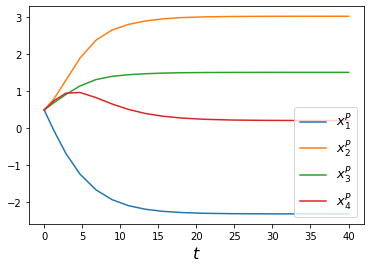

In [21]:
fig_sample, ax = plt.subplots(1, figsize=(6,4))
ax.plot(sample_sol.t, sample_sol.y[1], label=r"$x_1^P$")
ax.plot(sample_sol.t, sample_sol.y[3], label=r"$x_2^P$")
ax.plot(sample_sol.t, sample_sol.y[5], label=r"$x_3^P$")
ax.plot(sample_sol.t, sample_sol.y[7], label=r"$x_4^P$")
ax.set_xlabel(r"$t$", fontsize=16)
ax.legend(prop={'size':13})

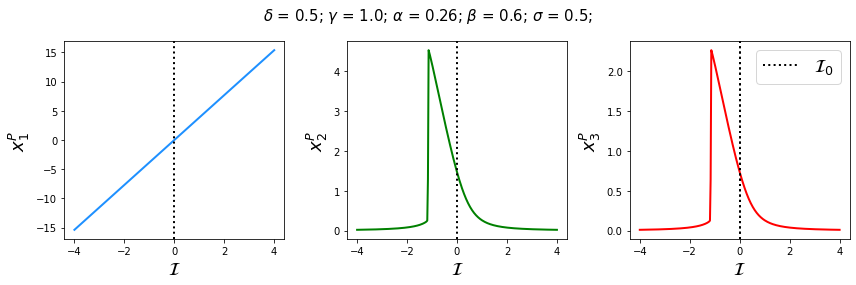

In [22]:
fig_unsat, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(12,4))
plot_colors = ['dodgerblue', 'green', 'red']
xps = [x1p, x2p, x3p]
for index, axis in enumerate([ax, ax1, ax2]):
    axis.plot(input_range, xps[index], c=plot_colors[index], lw=2)
    #axis.set_xlim([-1.2,0])
    #axis.fill_between(input_range, -20., 0.0, alpha=0.4)
    axis.axvline(Io, 0, 1, color="black", ls=":", lw=2)
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=18)
    axis.set_ylabel(fr"$x_{index+1}^P$", fontsize=18)

# Custom y-lim   
#ax.set_ylim([-0.0,1.7])
#ax1.set_ylim([1.4,2.5])
#ax2.set_ylim([0.5,0.70])

ax2.axvline(Io, 0, 1, color="black", ls=":", lw=2, label=r"$\mathcal{I}_0$")
ax2.legend(prop={'size':18}, loc=1)

# Set title
temp1 = fr"$\delta$ = {params[0]:0.2}; $\gamma$ = {params[1]:0.2}; $\alpha$ = {params[2]:0.2}; "
temp2 = fr"$\beta$ = {params[3]:0.2}; $\sigma$ = {params[4]:0.2};"
fig_unsat.suptitle(temp1+temp2, fontsize=15)

# Extra settings
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
# Export
#fig_unsat.savefig(os.path.join(path_to_fig, "unsatfff_twoinput_1.pdf"))